# Hierarchical Clustering Using Scipy
In this notebook, we will be using Scipy to make dendograms. The notebook gives the basic steps to realise a dendrogram from a numeric matrix. Let’s describe a few customisation that you can easily apply to your dendrogram based on the car dataset which contains different attributes like model, mpg, gear and other features related to cars.


## 1. Making a simple Dendogram


### Importing libraries


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np

### Importing Data Set

In [2]:
df = pd.read_csv('mtcars.csv')

In [3]:
df = df.set_index('model')

**Agglomerative Clustering** has different types like *WARD*,  *COMPLETE-LINK* and *AVERAGE*. We however will be using *WARD* clustering in this example. 

In [4]:
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')

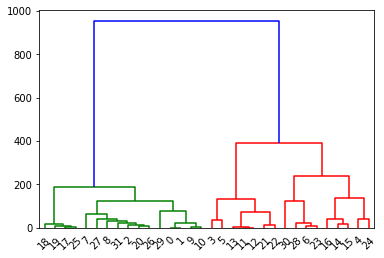

In [8]:
hierarchy.dendrogram(Z, leaf_font_size=10)
plt.show()

Above figure shows a simple dendogram without proper labels shown. Let us explore further and see how customizations can be made to improve the plot.

## 2. Adding leaf labels

In [9]:
del df.index.name

In [10]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
Z = hierarchy.linkage(df, 'ward')

**Task 1:** Make a dendogram for improving the leaf rotation, font size of labels. Keep in mind the following:

- leaf_rotation = 90
- leaf_font_size= 10
- labels=df.index

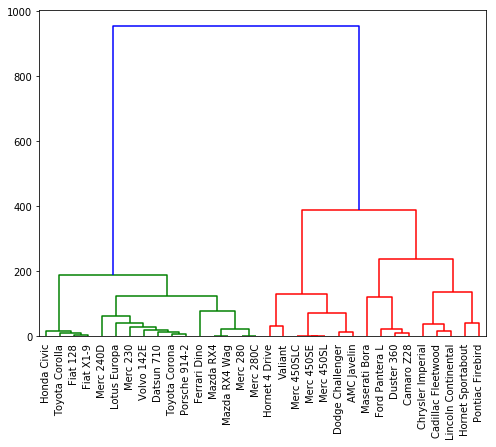

In [19]:
# Plot with Custom leaves
plt.figure(figsize=(8,6))
hierarchy.dendrogram(Z, leaf_rotation=90,  leaf_font_size=10, labels=df.index)
plt.show()

The above plot shows labels and names of different models, those which are adjusted to get a better understanding of the dendogram. We can further improve the visualization by changing the orientation of these labels.

## 3. Orientation

**Task 2:**: Fix the orientation of dendogram above by putting the orientation = "left". Please note that the lable font size should be 10

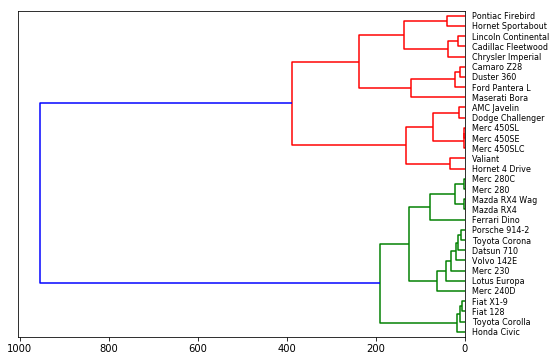

In [21]:
# Orientation of the dendrogram
plt.figure(figsize=(8,6))
hierarchy.dendrogram(Z, orientation= 'left', leaf_rotation=0,  leaf_font_size=8, labels=df.index)
plt.show()

The plot above shows how the orientation of the plot and labels can be changed. The orientation in the plot above has been made to right and can also be set to left.

## 4. Number of clusters

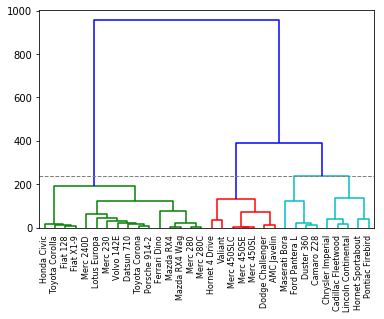

In [22]:
# Control number of clusters in the plot + add horizontal line.
hierarchy.dendrogram(Z, color_threshold=240,labels=df.index,leaf_rotation=90)
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')

A horizontal shows the threshold from where the clusters can be identified. Currently there are 3 clusters shown. Changing the threshold would result in different number of clusters.

# Hierarchical Clustering using SKLearn

We have a csv file that contains all the votes from the 114th Senate.  Each row contains the votes of an individual senator. Votes are coded as 0 for “No”, 1 for “Yes”, and 0.5 for “Abstain”. There are different columns having the bills, the party, and the state of each senator. Lets see how clustering will be applied on this data set.

## 1. Clustering
Let's now use sklearn's ```AgglomerativeClustering``` to conduct the heirarchical clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
data=pd.read_csv('114_congress.csv')
df_senate= data.copy()

In [25]:
df_senate.shape

(100, 18)

In [26]:
df_senate.head()

,name,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [27]:
df_senate.dtypes

name        object
party       object
state       object
Bill_1     float64
Bill_4     float64
Bill_5     float64
Bill_6     float64
Bill_7     float64
Bill_8     float64
Bill_9     float64
Bill_10    float64
Bill_20    float64
Bill_26    float64
Bill_32    float64
Bill_38    float64
Bill_39    float64
Bill_44    float64
Bill_47    float64
dtype: object

In [28]:
df_senate.set_index('name',inplace=True)

In [29]:
df_senate.head()

,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,,,
Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [30]:
X=df_senate.drop(['party','state'], axis = 1)

In [31]:
X.head()

,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,
Alexander,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [32]:
Y=df_senate['party']

In [33]:
Y.head()

name
Alexander    R
Ayotte       R
Baldwin      D
Barrasso     R
Bennet       D
Name: party, dtype: object

### Hierarchical Clustering

Ward is the default linkage algorithm, so we'll start with that

In [34]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)

Let's also try complete and average linkages

**Task 3**:
* Conduct hierarchical clustering with complete linkage, store the predicted labels in the variable ```complete_pred```
* Conduct hierarchical clustering with average linkage, store the predicted labels in the variable ```avg_pred```

In [39]:
# Hierarchical clustering using complete linkage
# Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete')

# Fit & predict
# Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(X)

# Hierarchical clustering using average linkage
# Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage = 'average')

# Fit & predict
# Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(X)

In [45]:
avg_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [43]:
avg

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x0000000004FBC9D8>)

In [42]:
complete

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x0000000004FBC9D8>)

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

Cluster validation indices are discussed later in the course.

In [46]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(Y, ward_pred)

**Task 4**:
* Calculate the Adjusted Rand score of the clusters resulting from complete linkage and average linkage

In [47]:
# Write the code to calculate the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(Y, complete_pred)

# Write a code to calculate the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(Y, avg_pred)

Which algorithm results in the higher Adjusted Rand Score?

In [48]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8110199642721615 
Complete:  0.8944016485750291 
Average:  0.8944016485750291


In [49]:
complete_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [50]:
print(pd.crosstab(complete_pred, df_senate["party"]))

party   D  I   R
row_0           
0       1  0  54
1      41  2   0
2       2  0   0


## 3. Dendrogram visualization with scipy

Let's visualize the highest scoring clustering result. 

To do that, we'll need to use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy

**Task 5:** Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values. Pick the one that resulted in the highest Adjusted Rand Score

In [56]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

#Write code here
linkage_type = 'complete' 

linkage_matrix = linkage(X, linkage_type)

In [53]:
linkage_matrix

array([[  1.        ,  20.        ,   0.        ,   2.        ],
       [  2.        ,   5.        ,   0.        ,   2.        ],
       [  3.        ,   6.        ,   0.        ,   2.        ],
       [  7.        , 101.        ,   0.        ,   3.        ],
       [  8.        , 102.        ,   0.        ,   3.        ],
       [ 10.        , 103.        ,   0.        ,   4.        ],
       [ 17.        , 104.        ,   0.        ,   4.        ],
       [ 12.        , 105.        ,   0.        ,   5.        ],
       [ 14.        , 107.        ,   0.        ,   6.        ],
       [ 29.        , 108.        ,   0.        ,   7.        ],
       [ 32.        , 109.        ,   0.        ,   8.        ],
       [ 37.        , 110.        ,   0.        ,   9.        ],
       [ 44.        , 111.        ,   0.        ,  10.        ],
       [ 41.        ,  50.        ,   0.        ,   2.        ],
       [ 54.        , 112.        ,   0.        ,  11.        ],
       [ 71.        , 113

**Task 6:**

Plot a dendogram using scipy's [dendrogram()](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function

- leaf_font_size=10
- labels=X.index
- orientation="right"
- figsize=(15,18)

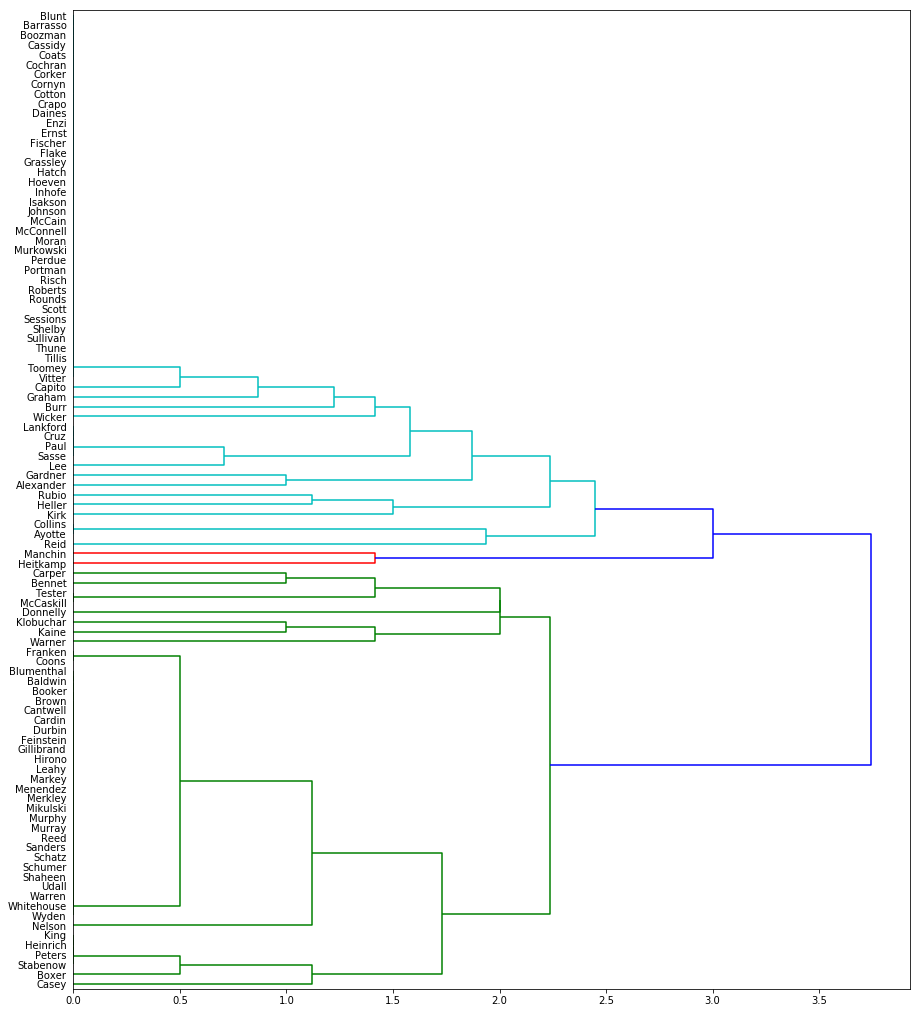

In [59]:
# write the code to plot using 'dendrogram()'
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15,18))
dendrogram(linkage_matrix, leaf_font_size=10, labels=X.index, orientation="right")
plt.show()


## 4. Visualization with Seaborn's ```clustermap``` 

The [seaborn](http://seaborn.pydata.org/index.html) plotting library for python can plot a [clustermap](http://seaborn.pydata.org/generated/seaborn.clustermap.html), which is a detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

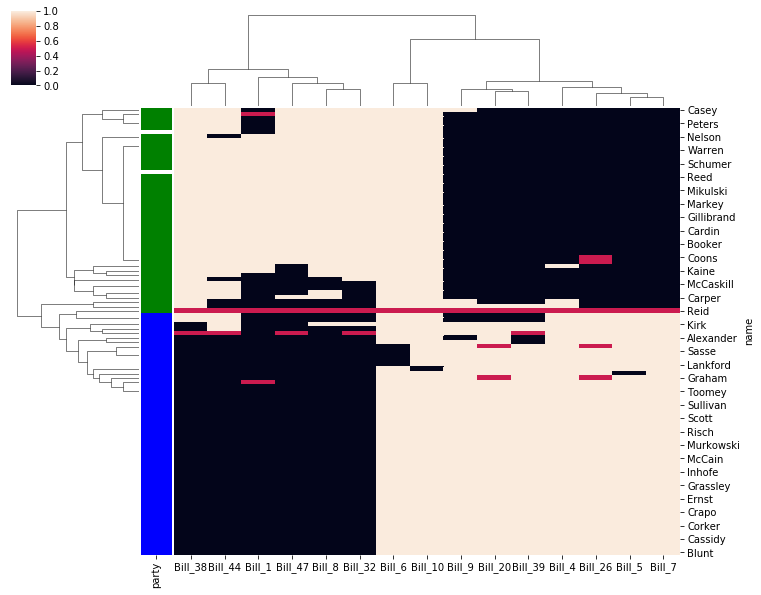

In [60]:
import seaborn as sns
lut = dict(zip(Y, "rbg"))
row_colors = Y.map(lut)
sns.clustermap(X, row_colors=row_colors, figsize=(12,10),method='complete')
plt.show()

Looking at the colors of the dimensions can you observe how they different senators have voted. The bar on the extreme left shows the party they belong to. The plot on the whole shows which of the senators have voted, which have not and which of them have abstained. 